Q: Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction 
intervals?

In [1]:
#A:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("Auto.csv")

df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

df.dropna(subset=["mpg", "horsepower"], inplace=True)

X = sm.add_constant(df["horsepower"])
y = df["mpg"]

model = sm.OLS(y, X).fit()

result= model.summary()

print(result)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           7.03e-81
Time:                        22:56:00   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

i: The p-value for the horsepower variable is very small (<<0.05), so there is strong evidence to believe that horsepower is associated with mpg.

In [12]:
residuals = model.resid

rse = (residuals ** 2).mean() ** 0.5

print(rse)

4.893226230065713


In [13]:
print(rse/df["mpg"].mean())

0.20870268988398827


In [19]:
print(model.rsquared)

0.6059482578894348


ii:The R-square is 0.60 which is can be seen as the strength of relationship.

In [21]:
print(model.params["horsepower"])

-0.15784473335365357


The relationship is negative

Q:Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

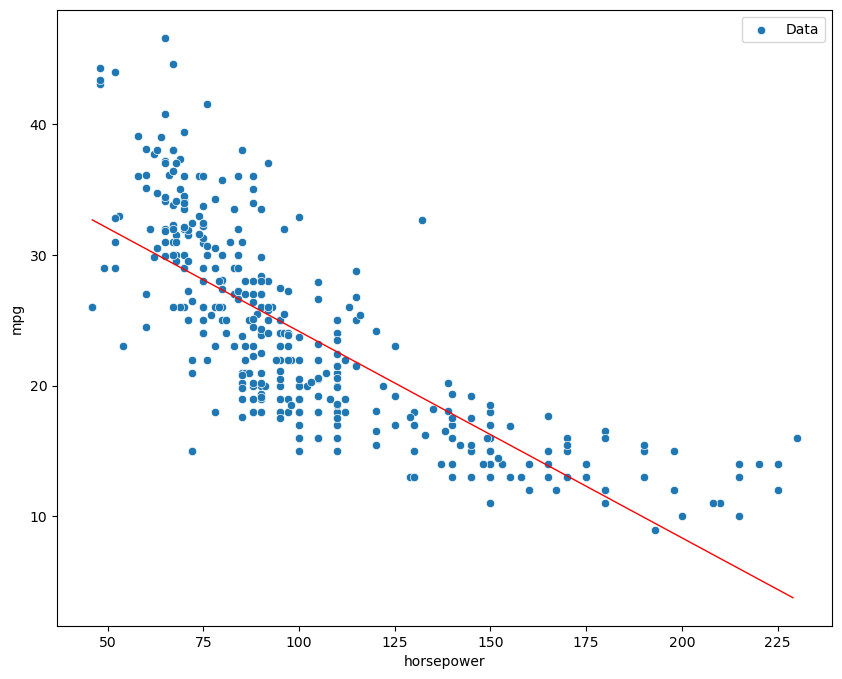

In [5]:
#A:

hp_values = pd.DataFrame({"horsepower": range(int(df["horsepower"].min()), int(df["horsepower"].max()))})
hp_values_with_constant = sm.add_constant(hp_values)
predicted_values = model.predict(hp_values_with_constant)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="horsepower", y="mpg", label="Data")
plt.plot(hp_values, predicted_values, color="red", linewidth=1, label="Fitted Line")

plt.show()

Q:Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

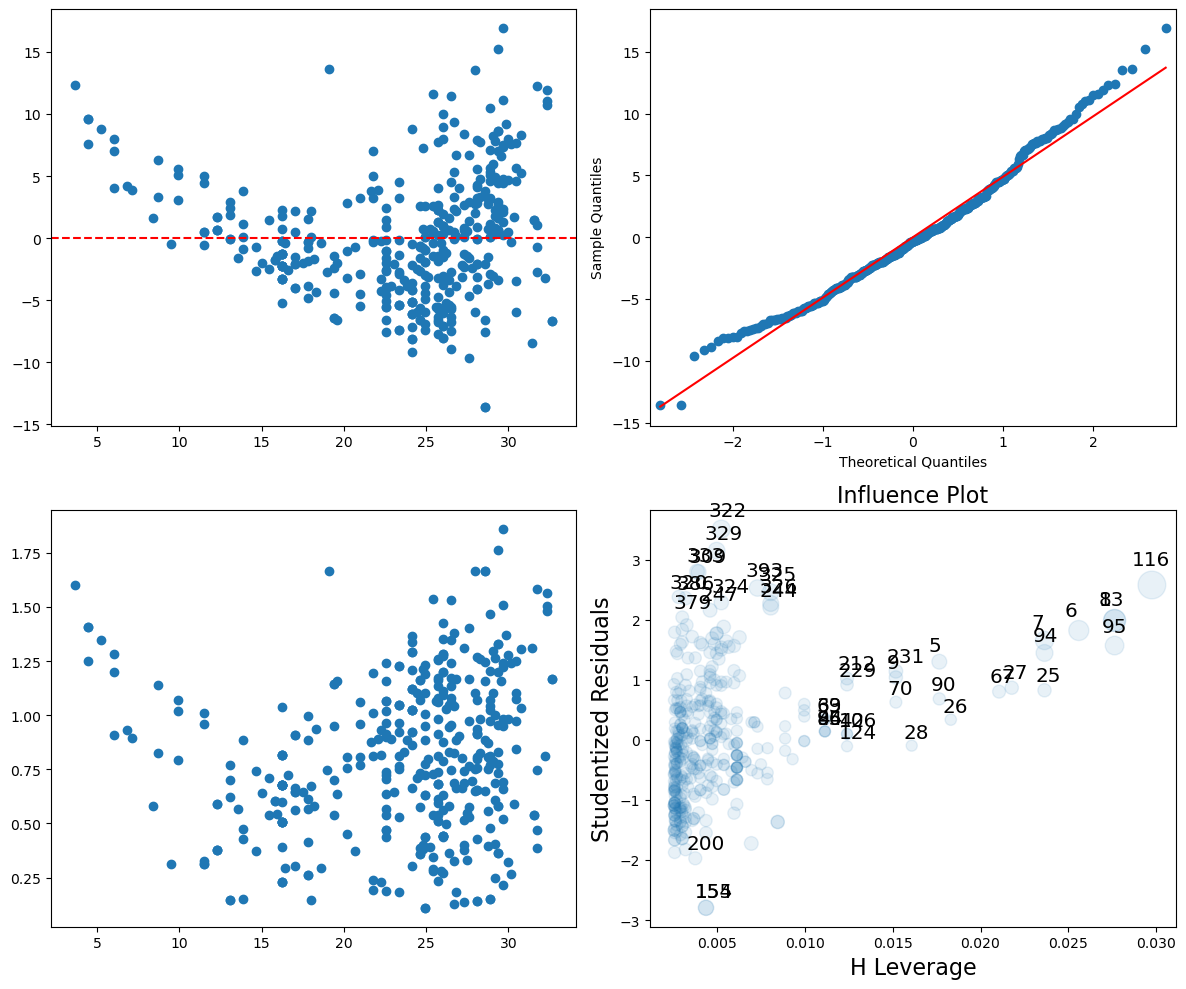

In [40]:
#A:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(model.fittedvalues, model.resid)
axes[0, 0].axhline(y=0, color="red", linestyle="--")


sm.qqplot(model.resid, line="s", ax=axes[0, 1])


axes[1, 0].scatter(model.fittedvalues, abs(model.get_influence().resid_studentized_internal)**0.5)


sm.graphics.influence_plot(model, ax=axes[1, 1],criterion= "Cooks", plot_alpha= 0.1, size =20)

plt.tight_layout()

plt.show()

Looking at the smoothing line of the residuals vs the fitted values, there is a strong pattern in the residuals, indicating non-linearity. You can see evidence of this in the scatter plot in part (b) too.

There are some observations with large standardized residuals & high leverage (hence, high Cook’s Distance) that may want to be reviewed.